In [42]:
#create dictionaries of data with exposure as keys
stdDict1 = {}
meanDict1 = {}
varDict1 = {}

In [2]:
#setup
from FrontPanelAPI import ok
import time
import numpy as np
import cv2

dev = ok.okCFrontPanel()
deviceCount = dev.GetDeviceCount()
for i in range(deviceCount):
    print 'Device[{0}] Model: {1}'.format(i, dev.GetDeviceListModel(i))
    print 'Device[{0}] Serial: {1}'.format(i, dev.GetDeviceListSerial(i))

dev = ok.okCFrontPanel()
dev.OpenBySerial("")
dev.ConfigureFPGA("ok_imager.bit")

Device[0] Model: 21
Device[0] Serial: 143400091C


0

In [3]:
#please close aperture

In [41]:
#grab 100 frames with aperture closed to obtain offset
dev = ok.okCFrontPanel()
deviceCount = dev.GetDeviceCount()
for i in range(deviceCount):
    print 'Device[{0}] Model: {1}'.format(i, dev.GetDeviceListModel(i))
    print 'Device[{0}] Serial: {1}'.format(i, dev.GetDeviceListSerial(i))

dev = ok.okCFrontPanel()
dev.OpenBySerial("")
dev.ConfigureFPGA("ok_imager.bit")
if dev.IsFrontPanelEnabled():
    row = 160
    N_adc = 4
    N_adcCh = 3
    N_mux = 46
    col = N_adc*N_adcCh*N_mux
    datain128 = bytearray(262144)
    datain1 = bytearray(88320)
    im = np.zeros((row ,col), np.uint8)
    im1 = np.zeros((79 ,60), np.uint8)
    im2 = np.zeros((79 ,60), np.uint8)
    
    exp =3.0
    exposure = int(10**exp)
    
    while exp<4.7:
        print exposure
        offset1 = np.zeros((79,60))
        elsecounter = 0   
        rep = 0
        dev.SetWireInValue(0x11,exposure)
        dev.SetWireInValue(0x12,1)
        dev.SetWireInValue(0x13,0)
        dev.SetWireInValue(0x14,0)
        dev.SetWireInValue(0x15, 0xfff003ff)
        dev.UpdateWireIns()
        time.sleep(0.01)
        # assert reset signal to initialize the FIFO
        dev.SetWireInValue(0x10, 0xff, 0x01)
        dev.UpdateWireIns()
        # deactivate reset signal and activate counter.
        dev.SetWireInValue(0x10, 0x00, 0x01)
        dev.UpdateWireIns()
        time.sleep(0.1)
        while rep<120:
            dev.UpdateTriggerOuts()
            # If the FIFO is full, read everything and display one frame only
            if dev.IsTriggered(0x6A, 0x01) == True:
                dev.ReadFromPipeOut(0xA0, datain128)
                for i in range(row):
                    for j in range(N_adc):
                        for k in range(N_adcCh):
                            for l in range(N_mux):
                                im[row-1-i][col-1-(j*N_adcCh*N_mux+(2-k)*N_mux+45-l)] = datain128[i*col+l*N_adc*N_adcCh+k*N_adc+j]
                #im = im/255
                im1[:,:] = im[1:80,142:262:2]
                if np.any(im1):
                    rep+=1
                    if rep>20: #to account for noise at the beginning
                        offset1 +=im1

            # If one frame is ready in FIFO
            elif dev.IsTriggered(0x6A, 0x02) == True:
                dev.ReadFromPipeOut(0xA0, datain1)
                for i in range(row):
                    for j in range(N_adc):
                        for k in range(N_adcCh):
                            for l in range(N_mux):
                                im[row-1-i][col-1-(j*N_adcCh*N_mux+(2-k)*N_mux+45-l)] = datain1[i*col+l*N_adc*N_adcCh+k*N_adc+j]
                #im = im/255
                im1[:,:] = im[1:80,142:262:2]
                rep+=1
                if np.any(im1):
                    if rep>20: #to account for noise at the beginning
                        offset1 +=im1
            else:
                elsecounter += 1
                print elsecounter
                if elsecounter>10:
                    elsecounter = 0
                    # assert reset signal to initialize the FIFO
                    dev.SetWireInValue(0x10, 0xff, 0x01)
                    dev.UpdateWireIns()
                    # deactivate reset signal and activate counter.
                    dev.SetWireInValue(0x10, 0x00, 0x01)
                    dev.UpdateWireIns()

            if (rep)%10 ==0:
                print rep 
        offset1= offset1/100
        cv2.imwrite(str(exposure)+'.png',offset1) #save offset images
        exp +=0.05
        exposure = int(10**exp)
else:
    print("FrontPanel host interface not detected.")

Device[0] Model: 21
Device[0] Serial: 143400091C
1000
10
20
30
40
50
60
70
80
90
100
110
120
1122
10
20
30
40
50
60
70
80
90
100
110
120
1258
10
20
30
40
50
60
70
80
90
100
110
120
1412
10
20
30
40
50
60
70
80
90
100
110
120
1584
10
20
30
40
50
60
70
80
90
100
110
120
1778
10
20
30
40
50
60
70
80
90
100
110
120
1995
10
20
30
40
50
60
70
80
90
100
110
120
2238
10
20
30
40
50
60
70
80
90
100
110
120
2511
10
20
30
40
50
60
70
80
90
100
110
120
2818
10
20
30
40
50
60
70
80
90
100
110
120
3162
10
20
30
40
50
60
70
80
90
100
110
120
3548
10
20
30
40
50
60
70
80
90
100
110
120
3981
10
20
30
40
50
60
70
80
90
100
110
120
4466
10
20
30
40
50
60
70
80
90
100
110
120
5011
10
20
30
40
50
60
70
80
90
100
110
120
5623
10
20
30
40
50
60
70
80
90
100
110
120
6309
10
20
30
40
50
60
70
80
90
100
110
120
7079
10
20
30
40
50
60
70
80
90
100
110
120
7943
10
20
30
40
50
60
70
80
90
100
110
120
8912
10
20
30
40
50
60
70
80
90
100
110
120
9999
10
20
30
40
50
60
70
80
90
100
110
120
11220
10
20
30
40
50
60
70


In [141]:
#if image did not turn out well, do that one manually
exposures = [1000]
for exposure in exposures:
    offset1 = np.zeros((79,60))
    elsecounter = 0   
    rep = 0
    dev.SetWireInValue(0x11,int(exposure))
    dev.SetWireInValue(0x12,1)
    dev.SetWireInValue(0x13,0)
    dev.SetWireInValue(0x14,0)
    dev.SetWireInValue(0x15, 0xfff003ff)
    dev.UpdateWireIns()
    # assert reset signal to initialize the FIFO
    dev.SetWireInValue(0x10, 0xff, 0x01)
    dev.UpdateWireIns()
    # deactivate reset signal and activate counter.
    dev.SetWireInValue(0x10, 0x00, 0x01)
    dev.UpdateWireIns()
    time.sleep(0.01)
    while rep<120:
        dev.UpdateTriggerOuts()
        # If the FIFO is full, read everything and display one frame only
        if dev.IsTriggered(0x6A, 0x01) == True:
            dev.ReadFromPipeOut(0xA0, datain128)
            for i in range(row):
                for j in range(N_adc):
                    for k in range(N_adcCh):
                        for l in range(N_mux):
                            im[row-1-i][col-1-(j*N_adcCh*N_mux+(2-k)*N_mux+45-l)] = datain128[i*col+l*N_adc*N_adcCh+k*N_adc+j]
            #im = im/255
            im1[:,:] = im[1:80,142:262:2]
            if np.any(im1>100):
                # assert reset signal to initialize the FIFO
                dev.SetWireInValue(0x10, 0xff, 0x01)
                dev.UpdateWireIns()
                # deactivate reset signal and activate counter.
                dev.SetWireInValue(0x10, 0x00, 0x01)
                dev.UpdateWireIns() 
            elif np.any(im1):
                rep+=1
                if rep>20: #to account for noise at the beginning
                    offset1 +=im1

        # If one frame is ready in FIFO
        elif dev.IsTriggered(0x6A, 0x02) == True:
            dev.ReadFromPipeOut(0xA0, datain1)
            for i in range(row):
                for j in range(N_adc):
                    for k in range(N_adcCh):
                        for l in range(N_mux):
                            im[row-1-i][col-1-(j*N_adcCh*N_mux+(2-k)*N_mux+45-l)] = datain1[i*col+l*N_adc*N_adcCh+k*N_adc+j]
            #im = im/255
            im1[:,:] = im[1:80,142:262:2]
            if np.any(im1>100):
                # assert reset signal to initialize the FIFO
                dev.SetWireInValue(0x10, 0xff, 0x01)
                dev.UpdateWireIns()
                # deactivate reset signal and activate counter.
                dev.SetWireInValue(0x10, 0x00, 0x01)
                dev.UpdateWireIns() 
            elif np.any(im1):
                rep+=1
                if rep>20: #to account for noise at the beginning
                    offset1 +=im1
        else:
            elsecounter += 1
            print elsecounter
            if elsecounter>10:
                elsecounter =0
                # assert reset signal to initialize the FIFO
                dev.SetWireInValue(0x10, 0xff, 0x01)
                dev.UpdateWireIns()
                # deactivate reset signal and activate counter.
                dev.SetWireInValue(0x10, 0x00, 0x01)
                dev.UpdateWireIns()

        if (rep)%10 ==0:
            print rep 
    offset1= offset1/100
    cv2.imwrite(str(exposure)+'.png',offset1) #save offset images

0
0
1
10
10
10
20
20
30
30
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
40
40
40
1
2
3
4
5
6
7
8
9
10
11
50
50
1
60
60
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
70
70
80
1
80
80
2
90
90
3
100
100
100
4
5
6
7
8
9
10
11
110
110
1
120


In [47]:
#please open aperture and expose camera to even illumination


[[34 36 33 ..., 29 32 31]
 [41 34 34 ..., 31 32 32]
 [33 32 35 ..., 31 28 33]
 ..., 
 [35 34 36 ..., 28 38 31]
 [33 35 35 ..., 30 35 28]
 [34 33 34 ..., 29 32 29]]


array([4, 8])

In [43]:
#grab 100 frames with aperture open to obtain signal 
#might have to manually change exposure due to issues with camera 
dev = ok.okCFrontPanel()
deviceCount = dev.GetDeviceCount()
for i in range(deviceCount):
    print 'Device[{0}] Model: {1}'.format(i, dev.GetDeviceListModel(i))
    print 'Device[{0}] Serial: {1}'.format(i, dev.GetDeviceListSerial(i))

dev = ok.okCFrontPanel()
dev.OpenBySerial("")
dev.ConfigureFPGA("ok_imager.bit")
if dev.IsFrontPanelEnabled():
    
    
    exp =3
    exposure = int(10**exp)
    
    while exp<4.7:
        row = 160
        N_adc = 4
        N_adcCh = 3
        N_mux = 46
        col = N_adc*N_adcCh*N_mux
        datain128 = bytearray(262144)
        datain1 = bytearray(88320)
        im = np.zeros((row ,col), np.uint8)
        im1 = np.zeros((79 ,60), np.uint8)
        im2 = np.zeros((79 ,60), np.uint8)
        data1 = np.zeros((100,79,60))
        imgcheck = np.zeros((79,60))
        elsecounter = 0 
        rep = 0
        print exposure
        offset1 = cv2.imread(str(int(exposure))+'.png',0)
        
        dev.SetWireInValue(0x11,exposure)
        dev.SetWireInValue(0x12,1)
        dev.SetWireInValue(0x13,0)
        dev.SetWireInValue(0x14,0)
        dev.SetWireInValue(0x15, 0xfff003ff)
        dev.UpdateWireIns()
        time.sleep(0.01)
        # assert reset signal to initialize the FIFO
        dev.SetWireInValue(0x10, 0xff, 0x01)
        dev.UpdateWireIns()
        # deactivate reset signal and activate counter.
        dev.SetWireInValue(0x10, 0x00, 0x01)
        dev.UpdateWireIns()
        time.sleep(0.1)
        
        while rep<120:
            dev.UpdateTriggerOuts()
            # If the FIFO is full, read everything and display one frame only
            if dev.IsTriggered(0x6A, 0x01) == True:
                dev.ReadFromPipeOut(0xA0, datain128)
                for i in range(row):
                    for j in range(N_adc):
                        for k in range(N_adcCh):
                            for l in range(N_mux):
                                im[row-1-i][col-1-(j*N_adcCh*N_mux+(2-k)*N_mux+45-l)] = datain128[i*col+l*N_adc*N_adcCh+k*N_adc+j]
                im1[:,:] = im[1:80,142:262:2]
                if np.any(im1):
                    

                    im1 = im1
                    rep+=1
                    if rep>20: #to account for noise at the beginning
                        imgcheck+=im1
                        data1[rep-21] =im1
                
            # If one frame is ready in FIFO
            elif dev.IsTriggered(0x6A, 0x02) == True:
                dev.ReadFromPipeOut(0xA0, datain1)
                for i in range(row):
                    for j in range(N_adc):
                        for k in range(N_adcCh):
                            for l in range(N_mux):
                                im[row-1-i][col-1-(j*N_adcCh*N_mux+(2-k)*N_mux+45-l)] = datain1[i*col+l*N_adc*N_adcCh+k*N_adc+j]
                
                im1[:,:] = im[1:80,142:262:2]
                if np.any(im1):

                    im1 = im1
                    rep+=1
                    if rep>20: #to account for noise at the beginning
                        imgcheck+=im1
                        data1[rep-21] =im1
            else:
                elsecounter += 1
                print elsecounter
                if elsecounter>10:
                    elsecounter = 0
                    # assert reset signal to initialize the FIFO
                    dev.SetWireInValue(0x10, 0xff, 0x01)
                    dev.UpdateWireIns()
                    # deactivate reset signal and activate counter.
                    dev.SetWireInValue(0x10, 0x00, 0x01)
                    dev.UpdateWireIns()

            if (rep)%10 ==0:
                print rep 
        #compute the standard deviation and average signal of each pixel 
        imgcheck = imgcheck/100 -offset1
        cv2.imwrite(str(exposure)+'test.png', imgcheck)#make sure the data is ok
        pixstd1 = np.zeros((79,60))
        pixmean1 = np.zeros((79,60))
        pixvar1 = np.zeros((79,60))
        for row in range(79):
            for col in range(60):
                pixstd1[row,col] = np.std(data1[:,row,col])
                pixmean1[row,col] = np.mean(data1[:,row,col])
                pixvar1[row,col] = np.var(data1[:,row,col])
        stdDict1[exposure] = pixstd1
        meanDict1[exposure] = pixmean1
        varDict1[exposure] = pixvar1
        exp +=0.05
        exposure = int(10**exp)
else:
    print("FrontPanel host interface not detected.")

Device[0] Model: 21
Device[0] Serial: 143400091C
1000
10
20
30
40
50
60
70
80
90
100
110
120
1122
10
20
30
40
50
60
70
80
90
100
110
120
1258
10
20
30
40
50
60
70
80
90
100
110
120
1412
10
20
30
40
50
60
70
80
90
100
110
120
1584
10
20
30
40
50
60
70
80
90
100
110
120
1778
10
20
30
40
50
60
70
80
90
100
110
120
1995
10
20
30
40
50
60
70
80
90
100
110
120
2238
10
20
30
40
50
60
70
80
90
100
110
120
2511
10
20
30
40
50
60
70
80
90
100
110
120
2818
10
20
30
40
50
60
70
80
90
100
110
120
3162
10
20
30
40
50
60
70
80
90
100
110
120
3548
10
20
30
40
50
60
70
80
90
100
110
120
3981
10
20
30
40
50
60
70
80
90
100
110
120
4466
10
20
30
40
50
60
70
80
90
100
110
120
5011
10
20
30
40
50
60
70
80
90
100
110
120
5623
10
20
30
40
50
60
70
80
90
100
110
120
6309
10
20
30
40
50
60
70
80
90
100
110
120
7079
10
20
30
40
50
60
70
80
90
100
110
120
7943
10
20
30
40
50
60
70
80
90
100
110
120
8912
10
20
30
40
50
60
70
80
90
100
110
120
9999
10
20
30
40
50
60
70
80
90
100
110
120
11220
10
20
30
40
50
60
70


In [44]:
import pickle

#save dictionaries

with open('stdDict1.pkl', 'wb') as output:
    pickle.dump(stdDict1, output)

with open('meanDict1.pkl', 'wb') as output:
    pickle.dump(meanDict1, output)
    
with open('varDict1.pkl', 'wb') as output:
    pickle.dump(varDict1, output)    


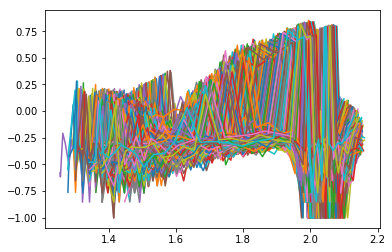

In [45]:
import math
import matplotlib.pyplot as plt
import numpy as np
#load dictionaries to plot data
with open('stdDict1.pkl', "rb") as fp:
    stdDict = pickle.load(fp) 

with open('meanDict1.pkl', "rb") as fp:
    meanDict = pickle.load(fp) 
    
with open('varDict1.pkl', "rb") as fp:
    varDict = pickle.load(fp)   
logmean= np.zeros((79,60,len(stdDict.keys())))
lognoise= np.zeros((79,60,len(stdDict.keys())))
i = 0
for key in sorted(stdDict.keys()):
    for row in range(79):
        for col in range(60):

            logmean[row,col,i] = math.log(meanDict[key][row, col],10)
            try:
                lognoise[row,col, i] = math.log(stdDict[key][row,col],10)
            except:
                lognoise[row,col, i] = 0
    
    i +=1
for row in range(79):
    for col in range(60):
        plt.plot(logmean[row, col], lognoise[row,col])
plt.show()

In [20]:
stdDict.pop(44668, None)
meanDict.pop(44668, None)
varDict.pop(44668, None)
stdDict.keys()

[2818,
 1412,
 31622,
 7943,
 3981,
 9999,
 5011,
 28183,
 35481,
 39810,
 6309,
 7079,
 14125,
 1584,
 25118,
 2238,
 5623,
 1995,
 2511,
 8912,
 11220,
 12589,
 3162,
 3548,
 1122,
 1000,
 1258,
 4466,
 19952,
 15848,
 1778,
 22387,
 17782]

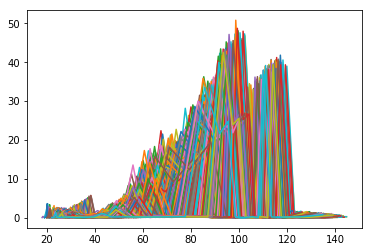

In [48]:
mean= np.zeros((79,60,len(stdDict.keys())))
var= np.zeros((79,60,len(stdDict.keys())))
i = 0
for key in sorted(stdDict.keys()):
    for row in range(79):
        for col in range(60):

            mean[row,col,i] = (meanDict[key][row, col])
            var[row,col, i] = (varDict[key][row,col])

    
    i +=1
for row in range(79):
    for col in range(60):
        plt.plot(mean[row, col], var[row,col])
plt.show()

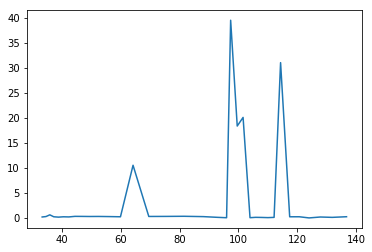

In [49]:
row = 40
col = 40
plt.plot(mean[row, col], var[row,col])
plt.show()